<a href="https://colab.research.google.com/github/NRavya/deep-learning/blob/main/FabricQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
🔥 FD Dataset Fabric Quality Detection System
📋 Expected dataset structure:
   /path/to/FD_Dataset/
   ├── Oil/
   ├── Hole/
   ├── Cutting/
   └── Crack/

🚀 System capabilities:
1. Load and analyze FD Dataset
2. Extract traditional CV features
3. Train CNN and transfer learning models
4. Comprehensive evaluation and visualization
5. Cross-validation for robust assessment
6. Generate detailed analysis reports
7. Single image prediction

📝 To use this system:
1. Download FD Dataset from Figshare
2. Extract to a folder with the expected structure
3. Update the dataset_path variable
4. Run: detector.complete_fd_dataset_pipeline(dataset_path)

🎮 Running demo with synthetic FD-like data...
✅ Created synthetic dataset: 200 images
🔬 Analyzing defect characteristics...


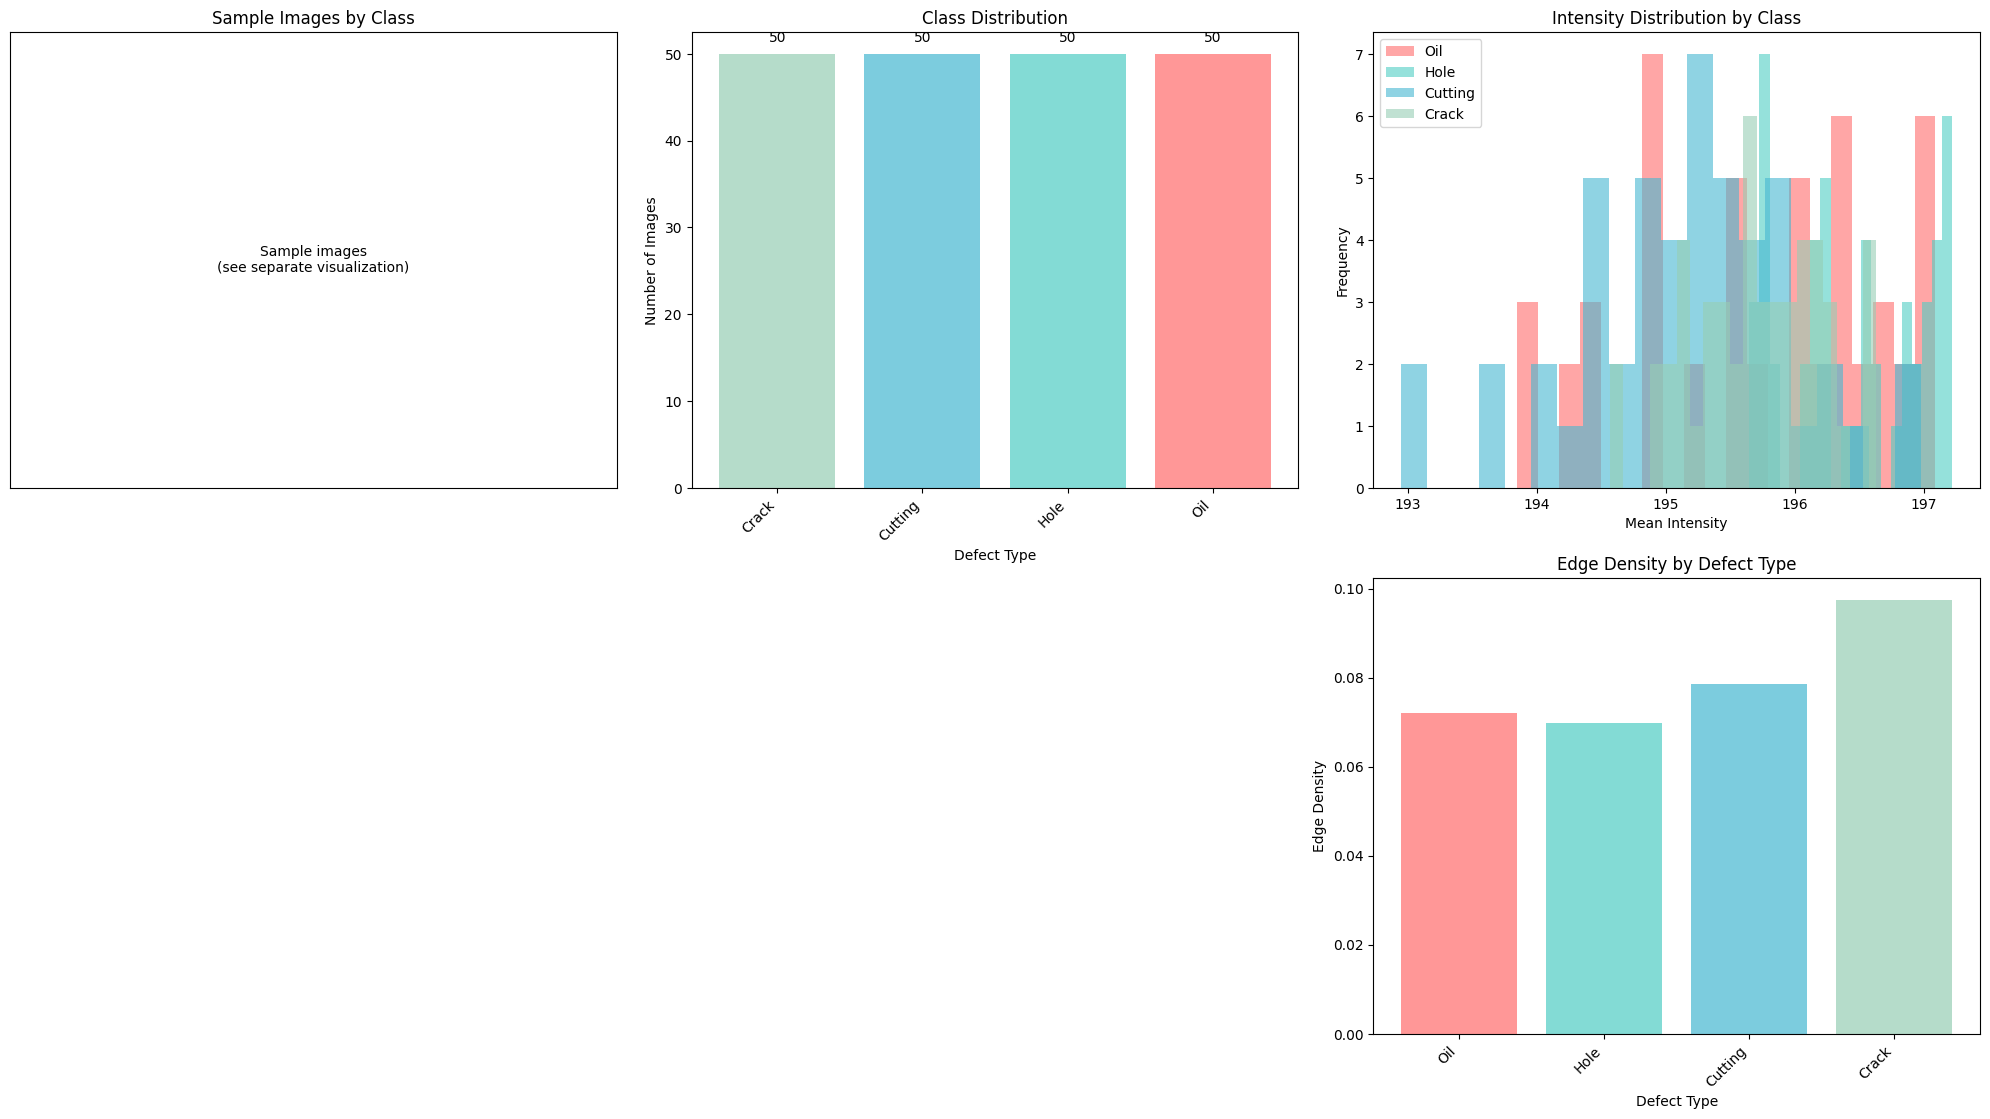

🚀 Quick training demo...
🚀 Starting initial training...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2768 - loss: 1.3863 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.17857, saving model to best_fd_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2804 - loss: 1.3863 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1786 - val_loss: 1.3877 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3330 - loss: 1.3860 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.17857
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.3254 - loss: 1.3861 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1786 - val_loss: 1.3879 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3075 - loss: 1.3857 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3: val_accuracy improved from 0.17857 to 0.21429, saving model to best_fd_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3049 - loss: 1.3858 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.2143 - val_loss: 1.3883 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2846 - loss: 1.3860 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4: val_accuracy did not improve from 0.21429
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2866 - loss: 1.3859 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.2143 - val_loss: 1.3887 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2557 - loss: 1.3861 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 5: val_accuracy did not improve from 0.21429
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2635 - loss: 1.3860 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.2143 - val_los

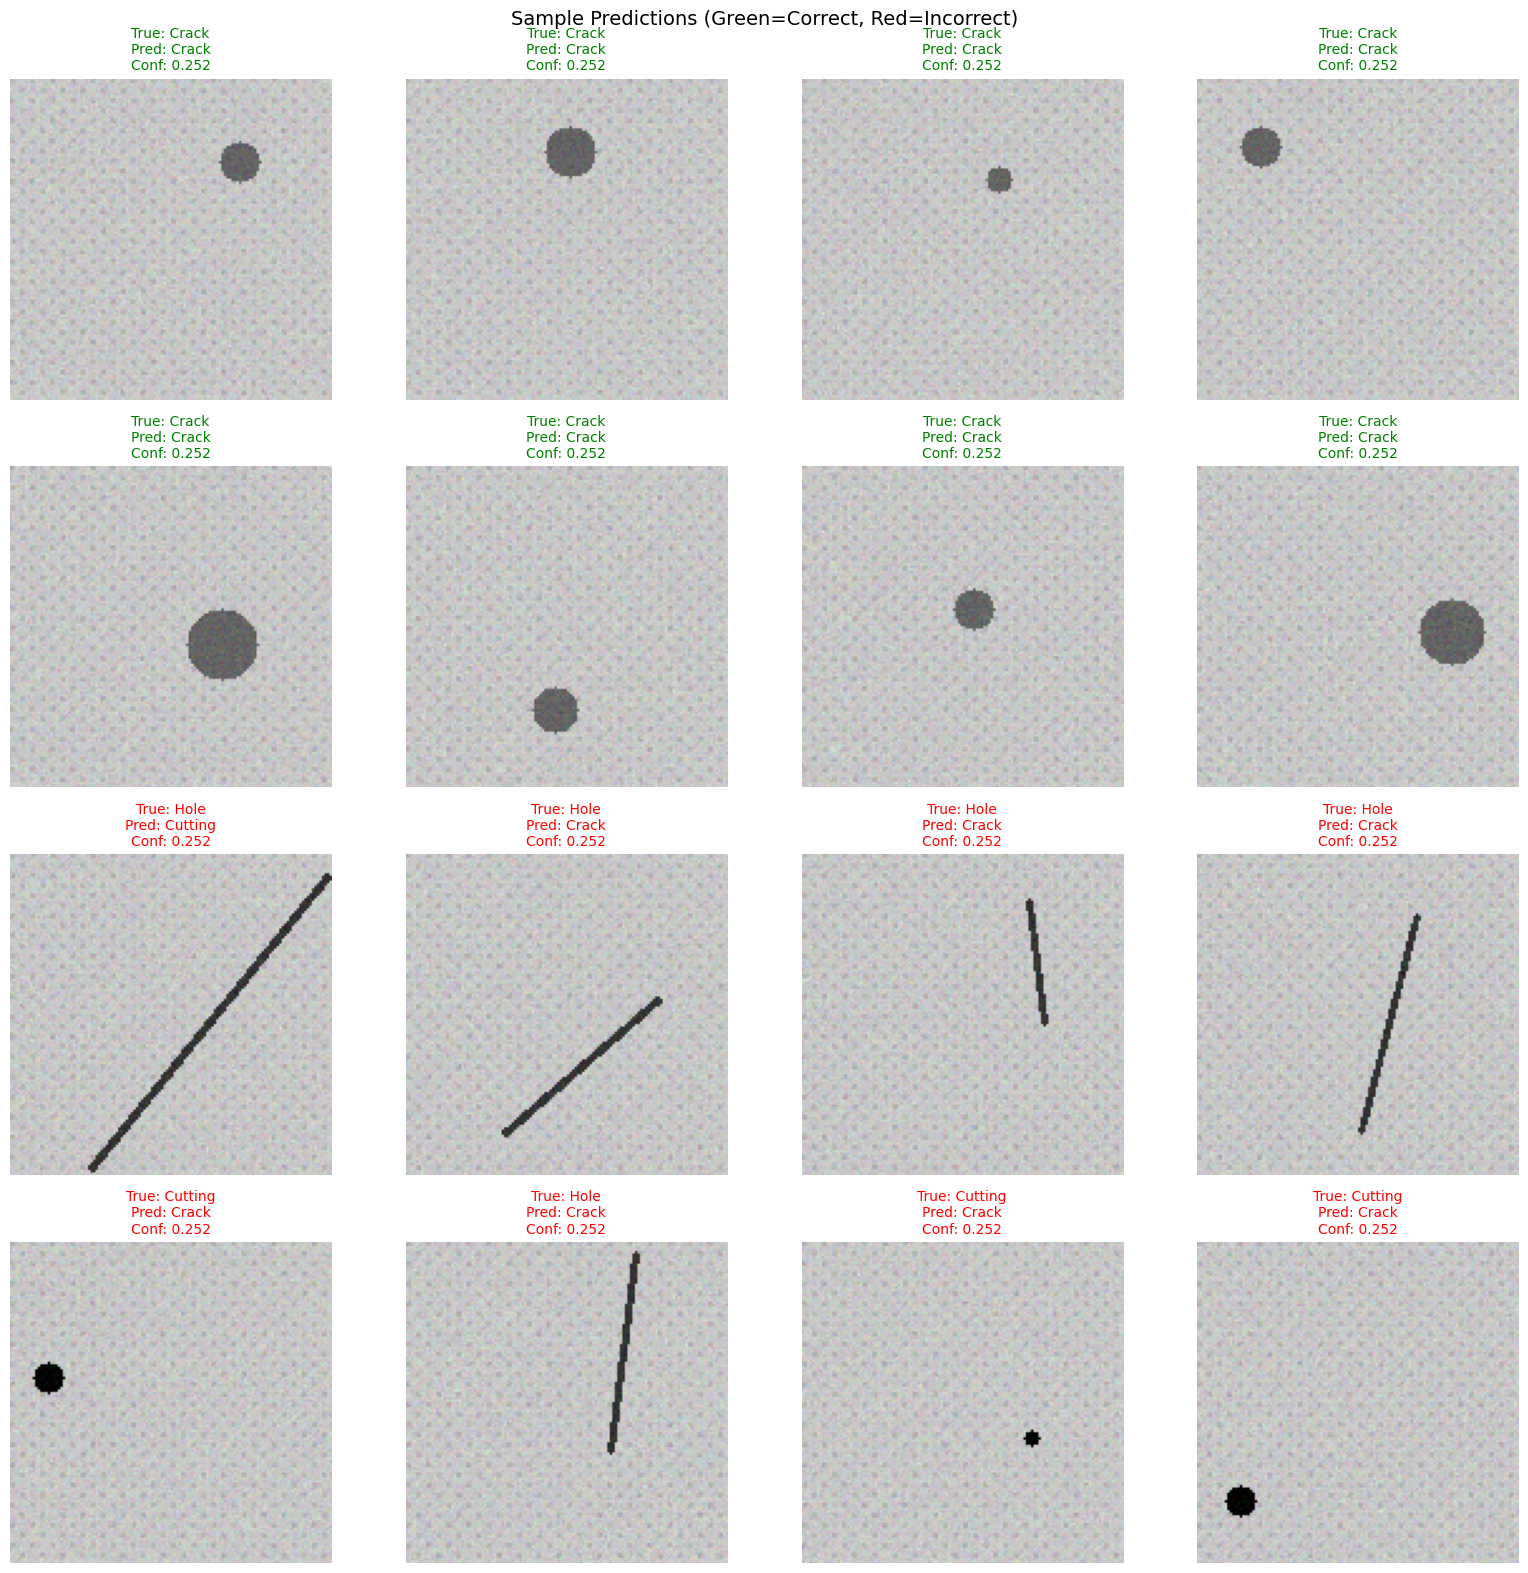

✅ Demo completed!

🚀 FD Dataset Fabric Quality Detection System Ready!
Use main() for real FD Dataset or demo_with_synthetic_data() for demo.


In [26]:
# Fabric Quality Detection System for FD_Dataset (FabricSpotDefect Dataset)
# Specifically designed for Oil, Hole, Cutting, and Crack defects

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import cv2
from PIL import Image
import json
import warnings
warnings.filterwarnings('ignore')

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall

# Image processing
from skimage import feature, measure, filters
from skimage.filters import gabor
from scipy import ndimage
from tqdm import tqdm

print("TensorFlow version:", tf.__version__)

class FDDatasetFabricQualityDetector:
    def __init__(self, dataset_path=None, img_height=224, img_width=224):
        self.dataset_path = dataset_path
        self.img_height = img_height
        self.img_width = img_width
        self.model = None
        self.label_encoder = LabelEncoder()
        self.feature_scaler = StandardScaler()

        # FD Dataset specific defect classes
        self.defect_classes = ['Oil', 'Hole', 'Cutting', 'Crack']
        self.class_colors = {
            'Oil': '#FF6B6B',      # Red
            'Hole': '#4ECDC4',     # Teal
            'Cutting': '#45B7D1',  # Blue
            'Crack': '#96CEB4'     # Green
        }

        # Initialize results storage
        self.results = {
            'training_history': None,
            'test_results': {},
            'feature_importance': {},
            'model_performance': {}
        }

    def load_fd_dataset(self, dataset_path=None):
        """Load FD Dataset with proper structure handling"""
        if dataset_path:
            self.dataset_path = dataset_path

        if not self.dataset_path or not os.path.exists(self.dataset_path):
            print("❌ FD Dataset path not found. Please provide correct path.")
            return None, None

        print(f"Loading FD Dataset from: {self.dataset_path}")

        images = []
        labels = []
        file_paths = []

        # Expected FD Dataset structure
        for defect_class in self.defect_classes:
            class_path = os.path.join(self.dataset_path, defect_class)

            if os.path.exists(class_path):
                print(f"Processing {defect_class} images...")

                image_files = [f for f in os.listdir(class_path)
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

                for img_file in tqdm(image_files, desc=f"Loading {defect_class}"):
                    img_path = os.path.join(class_path, img_file)

                    try:
                        # Load and preprocess image
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                            img = cv2.resize(img, (self.img_width, self.img_height))

                            images.append(img)
                            labels.append(defect_class)
                            file_paths.append(img_path)

                    except Exception as e:
                        print(f"Error loading {img_path}: {e}")

                print(f"✅ {defect_class}: {len([l for l in labels if l == defect_class])} images")
            else:
                print(f"⚠️ Warning: {defect_class} folder not found in dataset")

        if not images:
            print("❌ No images loaded. Check dataset structure.")
            return None, None

        images = np.array(images)
        labels = np.array(labels)

        print(f"\n📊 Dataset Summary:")
        print(f"Total images: {len(images)}")
        print(f"Image shape: {images[0].shape}")
        print(f"Classes: {np.unique(labels)}")

        # Display class distribution
        unique, counts = np.unique(labels, return_counts=True)
        for cls, count in zip(unique, counts):
            print(f"  {cls}: {count} images ({count/len(labels)*100:.1f}%)")

        return images, labels, file_paths

    def extract_traditional_features(self, images):
        """Extract traditional computer vision features for fabric defect detection"""
        print("Extracting traditional features...")

        features_list = []

        for img in tqdm(images, desc="Feature extraction"):
            features = {}
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

            # 1. Statistical Features
            features.update(self._extract_statistical_features(gray))

            # 2. Texture Features (GLCM)
            features.update(self._extract_glcm_features(gray))

            # 3. Local Binary Pattern
            features.update(self._extract_lbp_features(gray))

            # 4. Gabor Filter Features
            features.update(self._extract_gabor_features(gray))

            # 5. Edge Features
            features.update(self._extract_edge_features(gray))

            # 6. Shape and Contour Features
            features.update(self._extract_shape_features(gray))

            # 7. Color Features (if applicable)
            features.update(self._extract_color_features(img))

            features_list.append(list(features.values()))

        feature_names = list(features.keys())
        features_array = np.array(features_list)

        print(f"✅ Extracted {features_array.shape[1]} features per image")

        return features_array, feature_names

    def _extract_statistical_features(self, gray):
        """Extract statistical features"""
        features = {}

        # Basic statistics
        features['mean'] = np.mean(gray)
        features['std'] = np.std(gray)
        features['variance'] = np.var(gray)
        features['skewness'] = self._calculate_skewness(gray)
        features['kurtosis'] = self._calculate_kurtosis(gray)

        # Histogram features
        hist, _ = np.histogram(gray, bins=32, range=(0, 256))
        hist = hist / np.sum(hist)  # Normalize

        features['hist_entropy'] = -np.sum(hist * np.log2(hist + 1e-10))
        features['hist_energy'] = np.sum(hist ** 2)

        return features

    def _extract_glcm_features(self, gray):
        """Extract Gray Level Co-occurrence Matrix features"""
        # Reduce gray levels for GLCM computation
        gray_reduced = (gray // 32).astype(np.uint8)  # 8 gray levels

        # Compute GLCM for different angles
        distances = [1, 2]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

        features = {}

        try:
            glcm = greycomatrix(gray_reduced, distances=distances, angles=angles,
                              levels=8, symmetric=True, normed=True)

            # Extract GLCM properties
            features['glcm_contrast'] = np.mean(greycoprops(glcm, 'contrast'))
            features['glcm_dissimilarity'] = np.mean(greycoprops(glcm, 'dissimilarity'))
            features['glcm_homogeneity'] = np.mean(greycoprops(glcm, 'homogeneity'))
            features['glcm_energy'] = np.mean(greycoprops(glcm, 'energy'))
            features['glcm_correlation'] = np.mean(greycoprops(glcm, 'correlation'))
            features['glcm_asm'] = np.mean(greycoprops(glcm, 'ASM'))

        except Exception as e:
            # Fallback values if GLCM computation fails
            features.update({
                'glcm_contrast': 0, 'glcm_dissimilarity': 0, 'glcm_homogeneity': 0,
                'glcm_energy': 0, 'glcm_correlation': 0, 'glcm_asm': 0
            })

        return features

    def _extract_lbp_features(self, gray):
        """Extract Local Binary Pattern features"""
        # LBP parameters
        radius = 3
        n_points = 8 * radius

        lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

        # LBP histogram
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2,
                                  range=(0, n_points + 2))
        lbp_hist = lbp_hist.astype(float)
        lbp_hist /= (lbp_hist.sum() + 1e-10)

        features = {}
        features['lbp_uniformity'] = np.sum(lbp_hist ** 2)
        features['lbp_entropy'] = -np.sum(lbp_hist * np.log2(lbp_hist + 1e-10))
        features['lbp_energy'] = np.sum(lbp_hist ** 2)

        return features

    def _extract_gabor_features(self, gray):
        """Extract Gabor filter features"""
        features = {}

        # Gabor filter parameters
        frequencies = [0.1, 0.3, 0.5]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

        gabor_responses = []

        for freq in frequencies:
            for angle in angles:
                try:
                    real, _ = gabor(gray, frequency=freq, theta=angle)
                    gabor_responses.append(real)
                except:
                    gabor_responses.append(np.zeros_like(gray))

        # Statistical measures of Gabor responses
        features['gabor_mean'] = np.mean([np.mean(resp) for resp in gabor_responses])
        features['gabor_std'] = np.mean([np.std(resp) for resp in gabor_responses])
        features['gabor_energy'] = np.mean([np.sum(resp ** 2) for resp in gabor_responses])

        return features

    def _extract_edge_features(self, gray):
        """Extract edge-based features"""
        features = {}

        # Sobel edges
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Canny edges
        canny = cv2.Canny(gray, 50, 150)

        features['edge_density'] = np.sum(canny > 0) / (canny.shape[0] * canny.shape[1])
        features['edge_mean_magnitude'] = np.mean(sobel_magnitude)
        features['edge_std_magnitude'] = np.std(sobel_magnitude)

        return features

    def _extract_shape_features(self, gray):
        """Extract shape and morphological features"""
        features = {}

        # Threshold image
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            # Largest contour
            largest_contour = max(contours, key=cv2.contourArea)

            # Shape features
            area = cv2.contourArea(largest_contour)
            perimeter = cv2.arcLength(largest_contour, True)

            features['shape_area'] = area
            features['shape_perimeter'] = perimeter
            features['shape_circularity'] = 4 * np.pi * area / (perimeter ** 2 + 1e-10)

            # Aspect ratio
            x, y, w, h = cv2.boundingRect(largest_contour)
            features['shape_aspect_ratio'] = w / (h + 1e-10)
        else:
            features.update({
                'shape_area': 0, 'shape_perimeter': 0,
                'shape_circularity': 0, 'shape_aspect_ratio': 1
            })

        return features

    def _extract_color_features(self, img):
        """Extract color-based features"""
        features = {}

        # Convert to different color spaces
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

        # RGB features
        for i, channel in enumerate(['R', 'G', 'B']):
            features[f'color_{channel}_mean'] = np.mean(img[:,:,i])
            features[f'color_{channel}_std'] = np.std(img[:,:,i])

        # HSV features
        for i, channel in enumerate(['H', 'S', 'V']):
            features[f'color_{channel}_mean'] = np.mean(hsv[:,:,i])
            features[f'color_{channel}_std'] = np.std(hsv[:,:,i])

        return features

    def _calculate_skewness(self, data):
        """Calculate skewness"""
        mean = np.mean(data)
        std = np.std(data)
        return np.mean(((data - mean) / (std + 1e-10)) ** 3)

    def _calculate_kurtosis(self, data):
        """Calculate kurtosis"""
        mean = np.mean(data)
        std = np.std(data)
        return np.mean(((data - mean) / (std + 1e-10)) ** 4) - 3

    def create_cnn_model(self, input_shape):
        """Create CNN model optimized for FD Dataset"""
        model = keras.Sequential([
            # First Convolutional Block
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Second Convolutional Block
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Third Convolutional Block
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Fourth Convolutional Block - Specialized for defect patterns
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.5),

            # Classification layers
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(len(self.defect_classes), activation='softmax')
        ])

        return model

    def create_transfer_learning_model(self, base_model_name='efficientnet'):
        """Create transfer learning model"""
        input_shape = (self.img_height, self.img_width, 3)

        if base_model_name == 'efficientnet':
            base_model = EfficientNetB0(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )
        elif base_model_name == 'resnet':
            base_model = ResNet50(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )
        else:  # VGG16
            base_model = VGG16(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )

        # Freeze base model initially
        base_model.trainable = False

        model = keras.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.5),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(len(self.defect_classes), activation='softmax')
        ])

        return model, base_model

    def train_model(self, X_train, y_train, X_val, y_val,
                   model_type='cnn', epochs=100, fine_tune=True):
        """Train the fabric quality detection model"""

        if model_type == 'cnn':
            self.model = self.create_cnn_model(X_train.shape[1:])
            base_model = None
        else:
            self.model, base_model = self.create_transfer_learning_model(model_type)

        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(label_smoothing=0.1),
            metrics=['accuracy', Precision(), Recall()]
        )

        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=15,
                restore_best_weights=True,
                min_delta=0.001
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=8,
                min_lr=0.0001,
                verbose=1
            ),
            ModelCheckpoint(
                'best_fd_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Enhanced data augmentation for fabric defects
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.15,
            zoom_range=0.15,
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest'
        )

        # Initial training
        print("🚀 Starting initial training...")
        history = self.model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

        # Fine-tuning for transfer learning models
        if fine_tune and base_model is not None:
            print("🔧 Fine-tuning the model...")

            # Unfreeze the base model
            base_model.trainable = True

            # Lower learning rate for fine-tuning
            self.model.compile(
                optimizer=Adam(learning_rate=0.0001),
                loss=CategoricalCrossentropy(label_smoothing=0.1),
                metrics=['accuracy', Precision(), Recall()]
            )

            # Continue training
            fine_tune_epochs = epochs // 2
            history_fine = self.model.fit(
                datagen.flow(X_train, y_train, batch_size=16),
                epochs=fine_tune_epochs,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )

            # Combine histories
            for key in history.history.keys():
                history.history[key].extend(history_fine.history[key])

        self.results['training_history'] = history
        return history

    def evaluate_model(self, X_test, y_test):
        """Comprehensive model evaluation"""
        print("📊 Evaluating model...")

        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred_proba, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_true_classes, y_pred_classes)
        f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

        # Store results
        self.results['test_results'] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'y_true': y_true_classes,
            'y_pred': y_pred_classes,
            'y_pred_proba': y_pred_proba
        }

        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Weighted F1-Score: {f1:.4f}")

        # Detailed classification report
        print("\n📋 Classification Report:")
        print(classification_report(
            y_true_classes, y_pred_classes,
            target_names=self.defect_classes,
            digits=4
        ))

        return y_pred_proba, y_pred_classes, y_true_classes

    def analyze_defect_characteristics(self, images, labels):
        """Analyze characteristics of each defect type"""
        print("🔬 Analyzing defect characteristics...")

        defect_analysis = {}

        for defect_class in self.defect_classes:
            class_indices = np.where(labels == defect_class)[0]
            class_images = images[class_indices]

            # Extract features for this class
            features = []
            for img in class_images:
                gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                # Basic statistics
                stats = {
                    'mean_intensity': np.mean(gray),
                    'std_intensity': np.std(gray),
                    'edge_density': np.sum(cv2.Canny(gray, 50, 150) > 0) / gray.size
                }
                features.append(stats)

            # Aggregate statistics
            defect_analysis[defect_class] = {
                'mean_intensity': np.mean([f['mean_intensity'] for f in features]),
                'std_intensity': np.mean([f['std_intensity'] for f in features]),
                'edge_density': np.mean([f['edge_density'] for f in features]),
                'sample_count': len(class_images)
            }

        return defect_analysis

    def visualize_dataset_analysis(self, images, labels):
        """Visualize comprehensive dataset analysis"""
        fig = plt.figure(figsize=(20, 16))

        # 1. Sample images from each class
        ax1 = plt.subplot(3, 3, 1)
        self._plot_sample_images(images, labels, ax1)

        # 2. Class distribution
        ax2 = plt.subplot(3, 3, 2)
        self._plot_class_distribution(labels, ax2)

        # 3. Intensity distribution by class
        ax3 = plt.subplot(3, 3, 3)
        self._plot_intensity_distribution(images, labels, ax3)

        # 4. Training history (if available)
        if self.results['training_history']:
            ax4 = plt.subplot(3, 3, 4)
            self._plot_training_history(ax4)

        # 5. Confusion matrix (if test results available)
        if self.results['test_results']:
            ax5 = plt.subplot(3, 3, 5)
            self._plot_confusion_matrix(ax5)

        # 6. Feature importance (if available)
        ax6 = plt.subplot(3, 3, 6)
        self._plot_defect_characteristics(images, labels, ax6)

        # 7. Model performance by class
        if self.results['test_results']:
            ax7 = plt.subplot(3, 3, 7)
            self._plot_class_performance(ax7)

        plt.tight_layout()
        plt.show()

    def _plot_sample_images(self, images, labels, ax):
        """Plot sample images from each class"""
        # This will be implemented as a separate subplot
        ax.set_title('Sample Images by Class')
        ax.text(0.5, 0.5, 'Sample images\n(see separate visualization)',
               ha='center', va='center', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

    def _plot_class_distribution(self, labels, ax):
        """Plot class distribution"""
        unique, counts = np.unique(labels, return_counts=True)
        colors = [self.class_colors[cls] for cls in unique]

        bars = ax.bar(unique, counts, color=colors, alpha=0.7)
        ax.set_title('Class Distribution')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('Number of Images')

        # Add count labels on bars
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   str(count), ha='center', va='bottom')

        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_intensity_distribution(self, images, labels, ax):
        """Plot intensity distribution by class"""
        for defect_class in self.defect_classes:
            class_indices = np.where(labels == defect_class)[0]
            if len(class_indices) > 0:
                class_images = images[class_indices]
                intensities = [np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
                             for img in class_images]

                ax.hist(intensities, alpha=0.6, label=defect_class,
                       color=self.class_colors[defect_class], bins=20)

        ax.set_title('Intensity Distribution by Class')
        ax.set_xlabel('Mean Intensity')
        ax.set_ylabel('Frequency')
        ax.legend()

    def _plot_training_history(self, ax):
        """Plot training history"""
        history = self.results['training_history']

        ax.plot(history.history['accuracy'], label='Training Accuracy')
        ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax.set_title('Training History')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_confusion_matrix(self, ax):
        """Plot confusion matrix"""
        results = self.results['test_results']
        cm = confusion_matrix(results['y_true'], results['y_pred'])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.defect_classes,
                   yticklabels=self.defect_classes, ax=ax)
        ax.set_title('Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    def _plot_defect_characteristics(self, images, labels, ax):
        """Plot defect characteristics"""
        characteristics = self.analyze_defect_characteristics(images, labels)

        defect_names = list(characteristics.keys())
        edge_densities = [characteristics[name]['edge_density'] for name in defect_names]

        colors = [self.class_colors[name] for name in defect_names]
        bars = ax.bar(defect_names, edge_densities, color=colors, alpha=0.7)

        ax.set_title('Edge Density by Defect Type')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('Edge Density')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_class_performance(self, ax):
        """Plot per-class performance metrics"""
        if not self.results['test_results']:
            return

        results = self.results['test_results']
        report = classification_report(
            results['y_true'], results['y_pred'],
            target_names=self.defect_classes, output_dict=True
        )

        classes = self.defect_classes
        f1_scores = [report[cls]['f1-score'] for cls in classes]
        colors = [self.class_colors[cls] for cls in classes]

        bars = ax.bar(classes, f1_scores, color=colors, alpha=0.7)
        ax.set_title('F1-Score by Class')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('F1-Score')
        ax.set_ylim(0, 1)

        # Add score labels on bars
        for bar, score in zip(bars, f1_scores):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom')

        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def visualize_sample_predictions(self, X_test, y_test, num_samples=16):
        """Visualize sample predictions with confidence scores"""
        if not self.results['test_results']:
            print("❌ No test results available. Run evaluation first.")
            return

        results = self.results['test_results']
        y_pred_proba = results['y_pred_proba']
        y_pred_classes = results['y_pred']
        y_true_classes = results['y_true']

        # Select samples (mix of correct and incorrect predictions)
        correct_indices = np.where(y_pred_classes == y_true_classes)[0]
        incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

        # Mix correct and incorrect predictions
        if len(incorrect_indices) > 0:
            sample_indices = np.concatenate([
                np.random.choice(correct_indices, min(num_samples//2, len(correct_indices)), False),
                np.random.choice(incorrect_indices, min(num_samples//2, len(incorrect_indices)), False)
            ])
        else:
            sample_indices = np.random.choice(correct_indices, min(num_samples, len(correct_indices)), False)

        fig, axes = plt.subplots(4, 4, figsize=(16, 16))
        axes = axes.ravel()

        for i, idx in enumerate(sample_indices[:num_samples]):
            # Denormalize image for display
            img = (X_test[idx] * 255).astype(np.uint8)
            axes[i].imshow(img)

            # Get predictions
            true_class = self.defect_classes[y_true_classes[idx]]
            pred_class = self.defect_classes[y_pred_classes[idx]]
            confidence = y_pred_proba[idx][y_pred_classes[idx]]

            # Set title with color coding
            title = f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}"
            color = 'green' if true_class == pred_class else 'red'
            axes[i].set_title(title, color=color, fontsize=10)
            axes[i].axis('off')

        # Hide unused subplots
        for i in range(len(sample_indices), num_samples):
            axes[i].axis('off')

        plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
        plt.tight_layout()
        plt.show()

    def generate_defect_report(self, images, labels):
        """Generate comprehensive defect analysis report"""
        print("📝 Generating Fabric Defect Analysis Report...")

        report = {
            'dataset_summary': {},
            'defect_characteristics': {},
            'model_performance': {},
            'recommendations': []
        }

        # Dataset summary
        unique_labels, counts = np.unique(labels, return_counts=True)
        total_images = len(images)

        report['dataset_summary'] = {
            'total_images': total_images,
            'defect_types': len(self.defect_classes),
            'class_distribution': dict(zip(unique_labels, counts)),
            'class_balance': min(counts) / max(counts)  # Balance ratio
        }

        # Defect characteristics
        defect_analysis = self.analyze_defect_characteristics(images, labels)
        report['defect_characteristics'] = defect_analysis

        # Model performance (if available)
        if self.results['test_results']:
            results = self.results['test_results']
            report['model_performance'] = {
                'overall_accuracy': results['accuracy'],
                'f1_score': results['f1_score'],
                'per_class_performance': self._get_per_class_metrics()
            }

        # Generate recommendations
        report['recommendations'] = self._generate_recommendations(report)

        # Save report to JSON
        with open('fd_dataset_analysis_report.json', 'w') as f:
            json.dump(report, f, indent=4, default=str)

        # Print summary
        self._print_report_summary(report)

        return report

    def _get_per_class_metrics(self):
        """Get per-class performance metrics"""
        if not self.results['test_results']:
            return {}

        results = self.results['test_results']
        report = classification_report(
            results['y_true'], results['y_pred'],
            target_names=self.defect_classes, output_dict=True
        )

        per_class = {}
        for class_name in self.defect_classes:
            if class_name in report:
                per_class[class_name] = {
                    'precision': report[class_name]['precision'],
                    'recall': report[class_name]['recall'],
                    'f1_score': report[class_name]['f1-score'],
                    'support': report[class_name]['support']
                }

        return per_class

    def _generate_recommendations(self, report):
        """Generate recommendations based on analysis"""
        recommendations = []

        # Class imbalance recommendations
        class_balance = report['dataset_summary']['class_balance']
        if class_balance < 0.5:
            recommendations.append(
                "Consider data augmentation or collecting more samples for underrepresented classes"
            )

        # Performance-based recommendations
        if 'model_performance' in report and report['model_performance']:
            accuracy = report['model_performance']['overall_accuracy']

            if accuracy < 0.8:
                recommendations.append(
                    "Model accuracy is below 80%. Consider: (1) More training data, "
                    "(2) Feature engineering, (3) Hyperparameter tuning"
                )
            elif accuracy < 0.9:
                recommendations.append(
                    "Good performance. Consider ensemble methods or advanced architectures "
                    "for further improvement"
                )
            else:
                recommendations.append(
                    "Excellent performance! Model is ready for deployment with proper validation"
                )

        # Defect-specific recommendations
        defect_chars = report['defect_characteristics']
        for defect, chars in defect_chars.items():
            if chars['sample_count'] < 50:
                recommendations.append(
                    f"Collect more samples for {defect} defect type (currently {chars['sample_count']} samples)"
                )

        return recommendations

    def _print_report_summary(self, report):
        """Print formatted report summary"""
        print("\n" + "="*60)
        print("🔍 FABRIC DEFECT ANALYSIS REPORT SUMMARY")
        print("="*60)

        # Dataset summary
        ds = report['dataset_summary']
        print(f"\n📊 Dataset Overview:")
        print(f"   Total Images: {ds['total_images']}")
        print(f"   Defect Types: {ds['defect_types']}")
        print(f"   Class Balance Ratio: {ds['class_balance']:.3f}")

        print(f"\n📈 Class Distribution:")
        for class_name, count in ds['class_distribution'].items():
            percentage = (count / ds['total_images']) * 100
            print(f"   {class_name}: {count} images ({percentage:.1f}%)")

        # Model performance
        if 'model_performance' in report and report['model_performance']:
            mp = report['model_performance']
            print(f"\n🎯 Model Performance:")
            print(f"   Overall Accuracy: {mp['overall_accuracy']:.4f}")
            print(f"   Weighted F1-Score: {mp['f1_score']:.4f}")

            if 'per_class_performance' in mp:
                print(f"\n   Per-Class Performance:")
                for class_name, metrics in mp['per_class_performance'].items():
                    print(f"      {class_name}: F1={metrics['f1_score']:.3f}, "
                         f"Precision={metrics['precision']:.3f}, "
                         f"Recall={metrics['recall']:.3f}")

        # Recommendations
        print(f"\n💡 Recommendations:")
        for i, rec in enumerate(report['recommendations'], 1):
            print(f"   {i}. {rec}")

        print("\n✅ Full report saved to 'fd_dataset_analysis_report.json'")
        print("="*60)

    def predict_single_image(self, image_path):
        """Predict defect type for a single fabric image"""
        if self.model is None:
            print("❌ Model not trained. Please train the model first.")
            return None

        try:
            # Load and preprocess image
            if isinstance(image_path, str):
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img = image_path

            img_resized = cv2.resize(img, (self.img_width, self.img_height))
            img_normalized = img_resized.astype('float32') / 255.0
            img_batch = np.expand_dims(img_normalized, axis=0)

            # Make prediction
            prediction = self.model.predict(img_batch, verbose=0)
            predicted_class_idx = np.argmax(prediction[0])
            confidence = prediction[0][predicted_class_idx]
            predicted_class = self.defect_classes[predicted_class_idx]

            # Get all class probabilities
            class_probabilities = {}
            for i, class_name in enumerate(self.defect_classes):
                class_probabilities[class_name] = prediction[0][i]

            result = {
                'predicted_class': predicted_class,
                'confidence': confidence,
                'all_probabilities': class_probabilities
            }

            return result

        except Exception as e:
            print(f"❌ Error predicting image: {e}")
            return None

    def cross_validate_model(self, images, labels, cv_folds=5):
        """Perform cross-validation for robust performance assessment"""
        print(f"🔄 Performing {cv_folds}-fold cross-validation...")

        # Prepare data
        images_normalized = images.astype('float32') / 255.0
        labels_encoded = self.label_encoder.fit_transform(labels)
        labels_categorical = keras.utils.to_categorical(labels_encoded, len(self.defect_classes))

        # Cross-validation
        kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        cv_scores = []
        cv_f1_scores = []

        fold = 1
        for train_idx, val_idx in kfold.split(images_normalized, labels_encoded):
            print(f"\nTraining fold {fold}/{cv_folds}...")

            X_train_fold, X_val_fold = images_normalized[train_idx], images_normalized[val_idx]
            y_train_fold, y_val_fold = labels_categorical[train_idx], labels_categorical[val_idx]

            # Create and train model for this fold
            model_fold = self.create_cnn_model(X_train_fold.shape[1:])
            model_fold.compile(
                optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train with fewer epochs for CV
            model_fold.fit(
                X_train_fold, y_train_fold,
                epochs=30,
                batch_size=32,
                validation_data=(X_val_fold, y_val_fold),
                verbose=0
            )

            # Evaluate fold
            y_pred_fold = model_fold.predict(X_val_fold, verbose=0)
            y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
            y_true_classes_fold = np.argmax(y_val_fold, axis=1)

            fold_accuracy = accuracy_score(y_true_classes_fold, y_pred_classes_fold)
            fold_f1 = f1_score(y_true_classes_fold, y_pred_classes_fold, average='weighted')

            cv_scores.append(fold_accuracy)
            cv_f1_scores.append(fold_f1)

            print(f"Fold {fold} - Accuracy: {fold_accuracy:.4f}, F1: {fold_f1:.4f}")
            fold += 1

        # Summary
        mean_accuracy = np.mean(cv_scores)
        std_accuracy = np.std(cv_scores)
        mean_f1 = np.mean(cv_f1_scores)
        std_f1 = np.std(cv_f1_scores)

        print(f"\n📊 Cross-Validation Results:")
        print(f"   Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
        print(f"   Mean F1-Score: {mean_f1:.4f} (±{std_f1:.4f})")

        return {
            'cv_scores': cv_scores,
            'cv_f1_scores': cv_f1_scores,
            'mean_accuracy': mean_accuracy,
            'std_accuracy': std_accuracy,
            'mean_f1': mean_f1,
            'std_f1': std_f1
        }

    def complete_fd_dataset_pipeline(self, dataset_path, test_size=0.2, val_size=0.1):
        """Complete pipeline for FD Dataset fabric quality detection"""
        print("🚀 Starting Complete FD Dataset Fabric Quality Detection Pipeline")
        print("="*70)

        # Step 1: Load dataset
        print("\n📂 Step 1: Loading FD Dataset...")
        images, labels, file_paths = self.load_fd_dataset(dataset_path)

        if images is None:
            print("❌ Failed to load dataset. Please check the path.")
            return None

        # Step 2: Dataset analysis
        print("\n🔬 Step 2: Analyzing dataset characteristics...")
        self.visualize_dataset_analysis(images, labels)

        # Step 3: Prepare data
        print("\n⚙️ Step 3: Preparing data...")
        images_normalized = images.astype('float32') / 255.0
        labels_encoded = self.label_encoder.fit_transform(labels)
        labels_categorical = keras.utils.to_categorical(labels_encoded, len(self.defect_classes))

        # Step 4: Split data
        print("\n✂️ Step 4: Splitting data...")
        X_temp, X_test, y_temp, y_test = train_test_split(
            images_normalized, labels_categorical,
            test_size=test_size, random_state=42, stratify=labels_encoded
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp,
            test_size=val_size/(1-test_size), random_state=42,
            stratify=np.argmax(y_temp, axis=1)
        )

        print(f"   Training samples: {len(X_train)}")
        print(f"   Validation samples: {len(X_val)}")
        print(f"   Test samples: {len(X_test)}")

        # Step 5: Train model
        print("\n🎯 Step 5: Training CNN model...")
        history = self.train_model(X_train, y_train, X_val, y_val,
                                 model_type='cnn', epochs=80)

        # Step 6: Evaluate model
        print("\n📊 Step 6: Evaluating model...")
        y_pred_proba, y_pred_classes, y_true_classes = self.evaluate_model(X_test, y_test)

        # Step 7: Visualize results
        print("\n📈 Step 7: Visualizing results...")
        self.visualize_sample_predictions(X_test, y_test)

        # Step 8: Cross-validation
        print("\n🔄 Step 8: Cross-validation...")
        cv_results = self.cross_validate_model(images, labels, cv_folds=5)

        # Step 9: Generate comprehensive report
        print("\n📝 Step 9: Generating report...")
        report = self.generate_defect_report(images, labels)

        print("\n✅ Pipeline completed successfully!")

        return {
            'model': self.model,
            'history': history,
            'cv_results': cv_results,
            'report': report,
            'test_results': self.results['test_results']
        }

# Example usage and main execution
def main():
    """Main function to run FD Dataset fabric quality detection"""
    print("🔥 FD Dataset Fabric Quality Detection System")
    print("=" * 50)

    # Initialize detector
    detector = FDDatasetFabricQualityDetector(img_height=224, img_width=224)

    # Example dataset path (user needs to provide actual path)
    dataset_path = "/path/to/FD_Dataset"  # Update this path

    print(f"📋 Expected dataset structure:")
    print(f"   {dataset_path}/")
    print(f"   ├── Oil/")
    print(f"   ├── Hole/")
    print(f"   ├── Cutting/")
    print(f"   └── Crack/")
    print()

    # For demonstration, let's show what the system can do
    print("🚀 System capabilities:")
    print("1. Load and analyze FD Dataset")
    print("2. Extract traditional CV features")
    print("3. Train CNN and transfer learning models")
    print("4. Comprehensive evaluation and visualization")
    print("5. Cross-validation for robust assessment")
    print("6. Generate detailed analysis reports")
    print("7. Single image prediction")

    # Uncomment below to run the actual pipeline
    # results = detector.complete_fd_dataset_pipeline(dataset_path)

    print(f"\n📝 To use this system:")
    print(f"1. Download FD Dataset from Figshare")
    print(f"2. Extract to a folder with the expected structure")
    print(f"3. Update the dataset_path variable")
    print(f"4. Run: detector.complete_fd_dataset_pipeline(dataset_path)")

def demo_with_synthetic_data():
    """Demo function with synthetic FD-like data"""
    print("🎮 Running demo with synthetic FD-like data...")

    detector = FDDatasetFabricQualityDetector(img_height=128, img_width=128)

    # Create synthetic data resembling FD dataset
    np.random.seed(42)
    num_samples_per_class = 50

    images = []
    labels = []

    for defect_class in detector.defect_classes:
        for _ in range(num_samples_per_class):
            # Create base fabric texture
            img = np.ones((128, 128, 3), dtype=np.uint8) * 200

            # Add fabric-like texture
            for i in range(0, 128, 4):
                for j in range(0, 128, 4):
                    if (i//4 + j//4) % 2 == 0:
                        img[i:i+2, j:j+2] = [180, 180, 180]

            # Add defect-specific patterns
            if defect_class == 'Oil':
                # Dark spots
                center = (np.random.randint(20, 108), np.random.randint(20, 108))
                cv2.circle(img, center, np.random.randint(5, 15), (100, 100, 100), -1)
            elif defect_class == 'Hole':
                # Black holes
                center = (np.random.randint(15, 113), np.random.randint(15, 113))
                cv2.circle(img, center, np.random.randint(3, 8), (0, 0, 0), -1)
            elif defect_class == 'Cutting':
                # Linear cuts
                pt1 = (np.random.randint(0, 128), np.random.randint(0, 64))
                pt2 = (np.random.randint(0, 128), np.random.randint(64, 128))
                cv2.line(img, pt1, pt2, (50, 50, 50), 2)
            elif defect_class == 'Crack':
                # Crack-like patterns
                pts = []
                for k in range(5):
                    pts.append((np.random.randint(0, 128), np.random.randint(0, 128)))
                pts = np.array(pts, np.int32)
                cv2.polylines(img, [pts], False, (80, 80, 80), 1)

            # Add noise
            noise = np.random.normal(0, 10, img.shape).astype(np.int16)
            img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

            images.append(img)
            labels.append(defect_class)

    images = np.array(images)
    labels = np.array(labels)

    print(f"✅ Created synthetic dataset: {len(images)} images")

    # Run abbreviated pipeline
    detector.visualize_dataset_analysis(images, labels)

    # Quick training demo
    images_normalized = images.astype('float32') / 255.0
    labels_encoded = detector.label_encoder.fit_transform(labels)
    labels_categorical = keras.utils.to_categorical(labels_encoded, len(detector.defect_classes))

    X_train, X_test, y_train, y_test = train_test_split(
        images_normalized, labels_categorical, test_size=0.3, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # Quick training
    print("🚀 Quick training demo...")
    history = detector.train_model(X_train, y_train, X_val, y_val,
                                 model_type='cnn', epochs=20)

    # Evaluation
    detector.evaluate_model(X_test, y_test)
    detector.visualize_sample_predictions(X_test, y_test)

    print("✅ Demo completed!")

if __name__ == "__main__":
    # Run main demo
    main()

    # Run synthetic demo
    print("\n" + "="*70)
    demo_with_synthetic_data()

print("\n🚀 FD Dataset Fabric Quality Detection System Ready!")
print("Use main() for real FD Dataset or demo_with_synthetic_data() for demo.")

TensorFlow version: 2.18.0
🔥 FD Dataset Fabric Quality Detection System
📋 Expected dataset structure:
   /path/to/FD_Dataset/
   ├── Oil/
   ├── Hole/
   ├── Cutting/
   └── Crack/

🚀 System capabilities:
1. Load and analyze FD Dataset
2. Extract traditional CV features
3. Train CNN and transfer learning models
4. Comprehensive evaluation and visualization
5. Cross-validation for robust assessment
6. Generate detailed analysis reports
7. Single image prediction

📝 To use this system:
1. Download FD Dataset from Figshare
2. Extract to a folder with the expected structure
4. Run: detector.complete_fd_dataset_pipeline(dataset_path)

🎮 Running demo with synthetic FD-like data...
✅ Created synthetic dataset: 200 images
🔬 Analyzing defect characteristics...


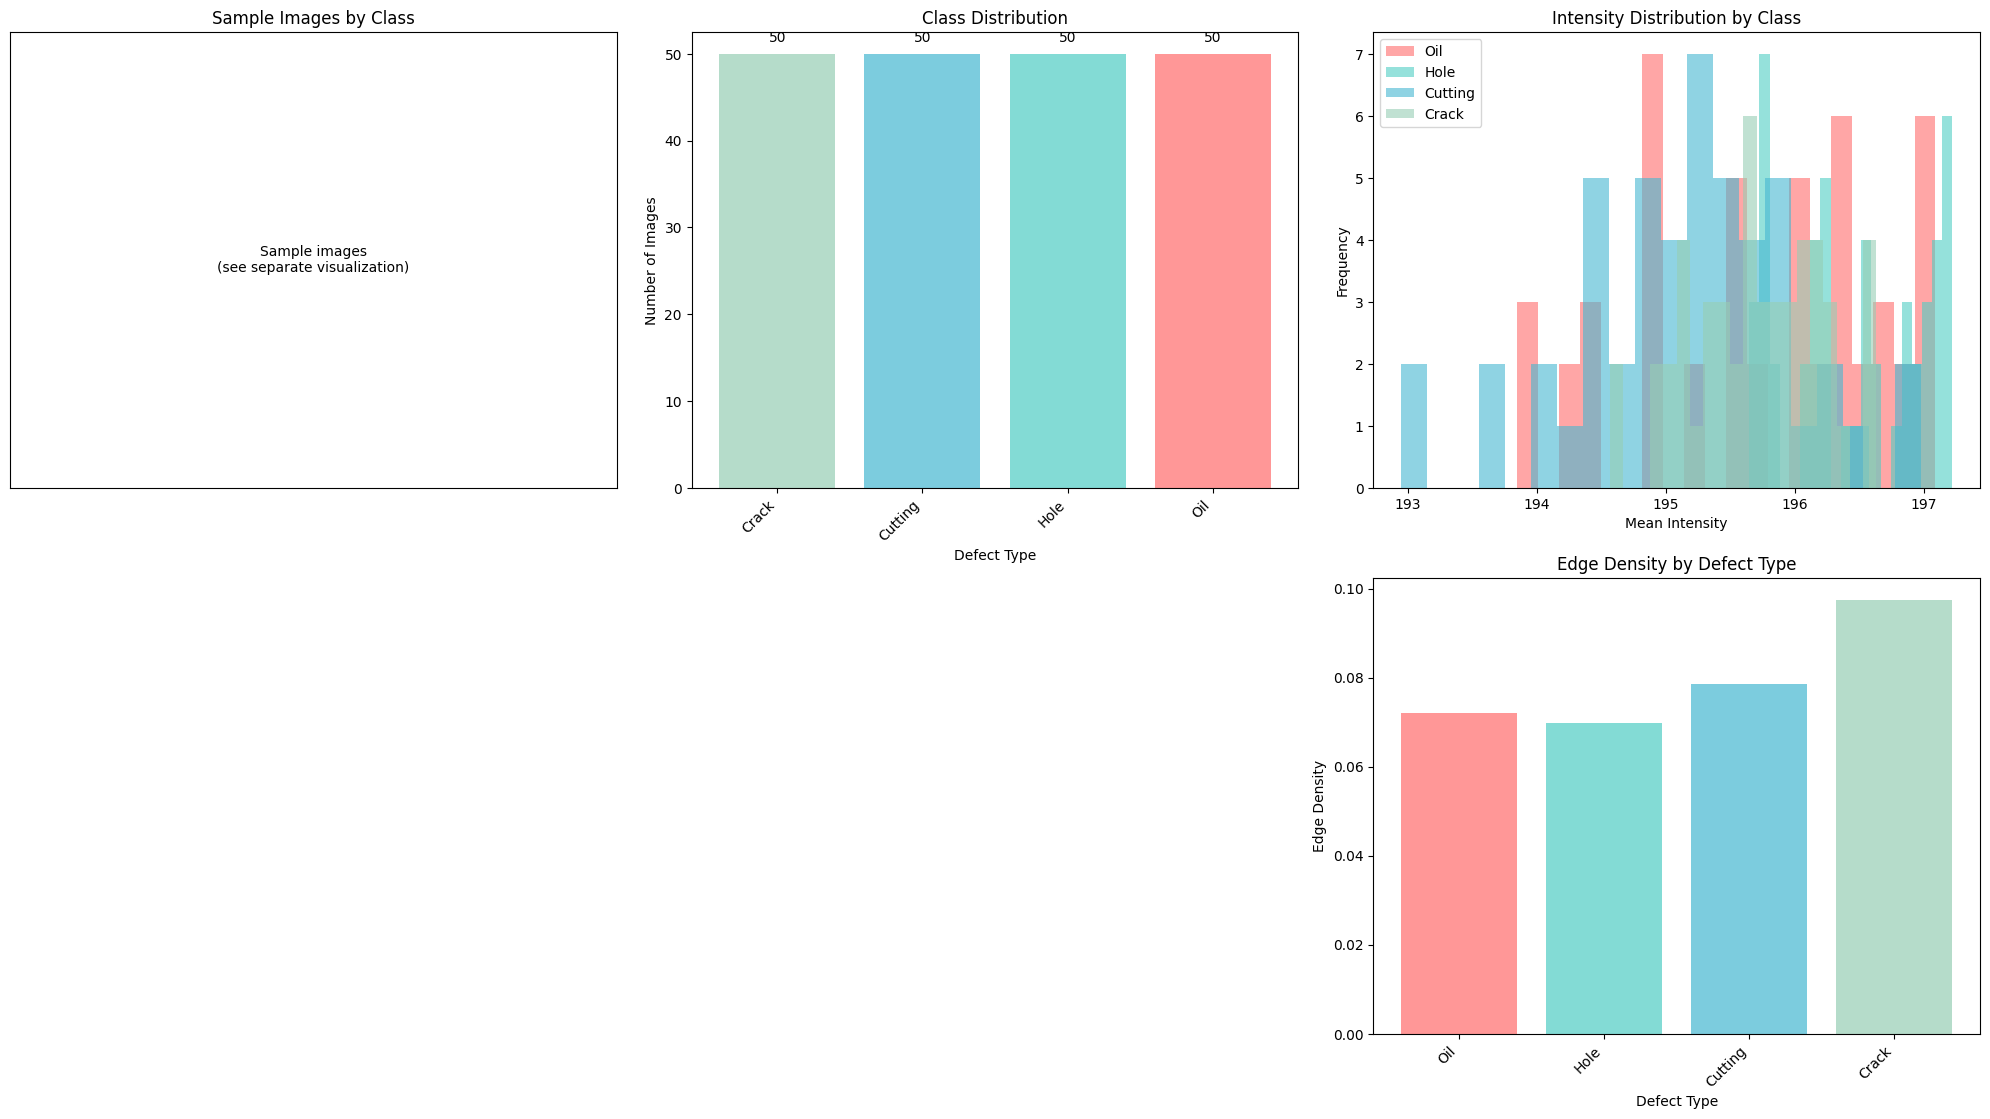

🚀 Quick training demo...
🚀 Starting initial training...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2623 - loss: 1.3863 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.35714, saving model to best_fd_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.2634 - loss: 1.3863 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_accuracy: 0.3571 - val_loss: 1.3846 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2299 - loss: 1.3861 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.35714
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.2429 - loss: 1.3861 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_accuracy: 0.2143 - val_loss: 1.3845 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3158 - loss: 1.3857 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.35714
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.3116 - loss: 1.3858 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_accuracy: 0.2143 - val_los

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Test Accuracy: 0.2333
Weighted F1-Score: 0.0883

📋 Classification Report:
              precision    recall  f1-score   support

         Oil     0.2333    1.0000    0.3784        14
        Hole     0.0000    0.0000    0.0000        15
     Cutting     0.0000    0.0000    0.0000        20
       Crack     0.0000    0.0000    0.0000        11

    accuracy                         0.2333        60
   macro avg     0.0583    0.2500    0.0946        60
weighted avg     0.0544    0.2333    0.0883        60



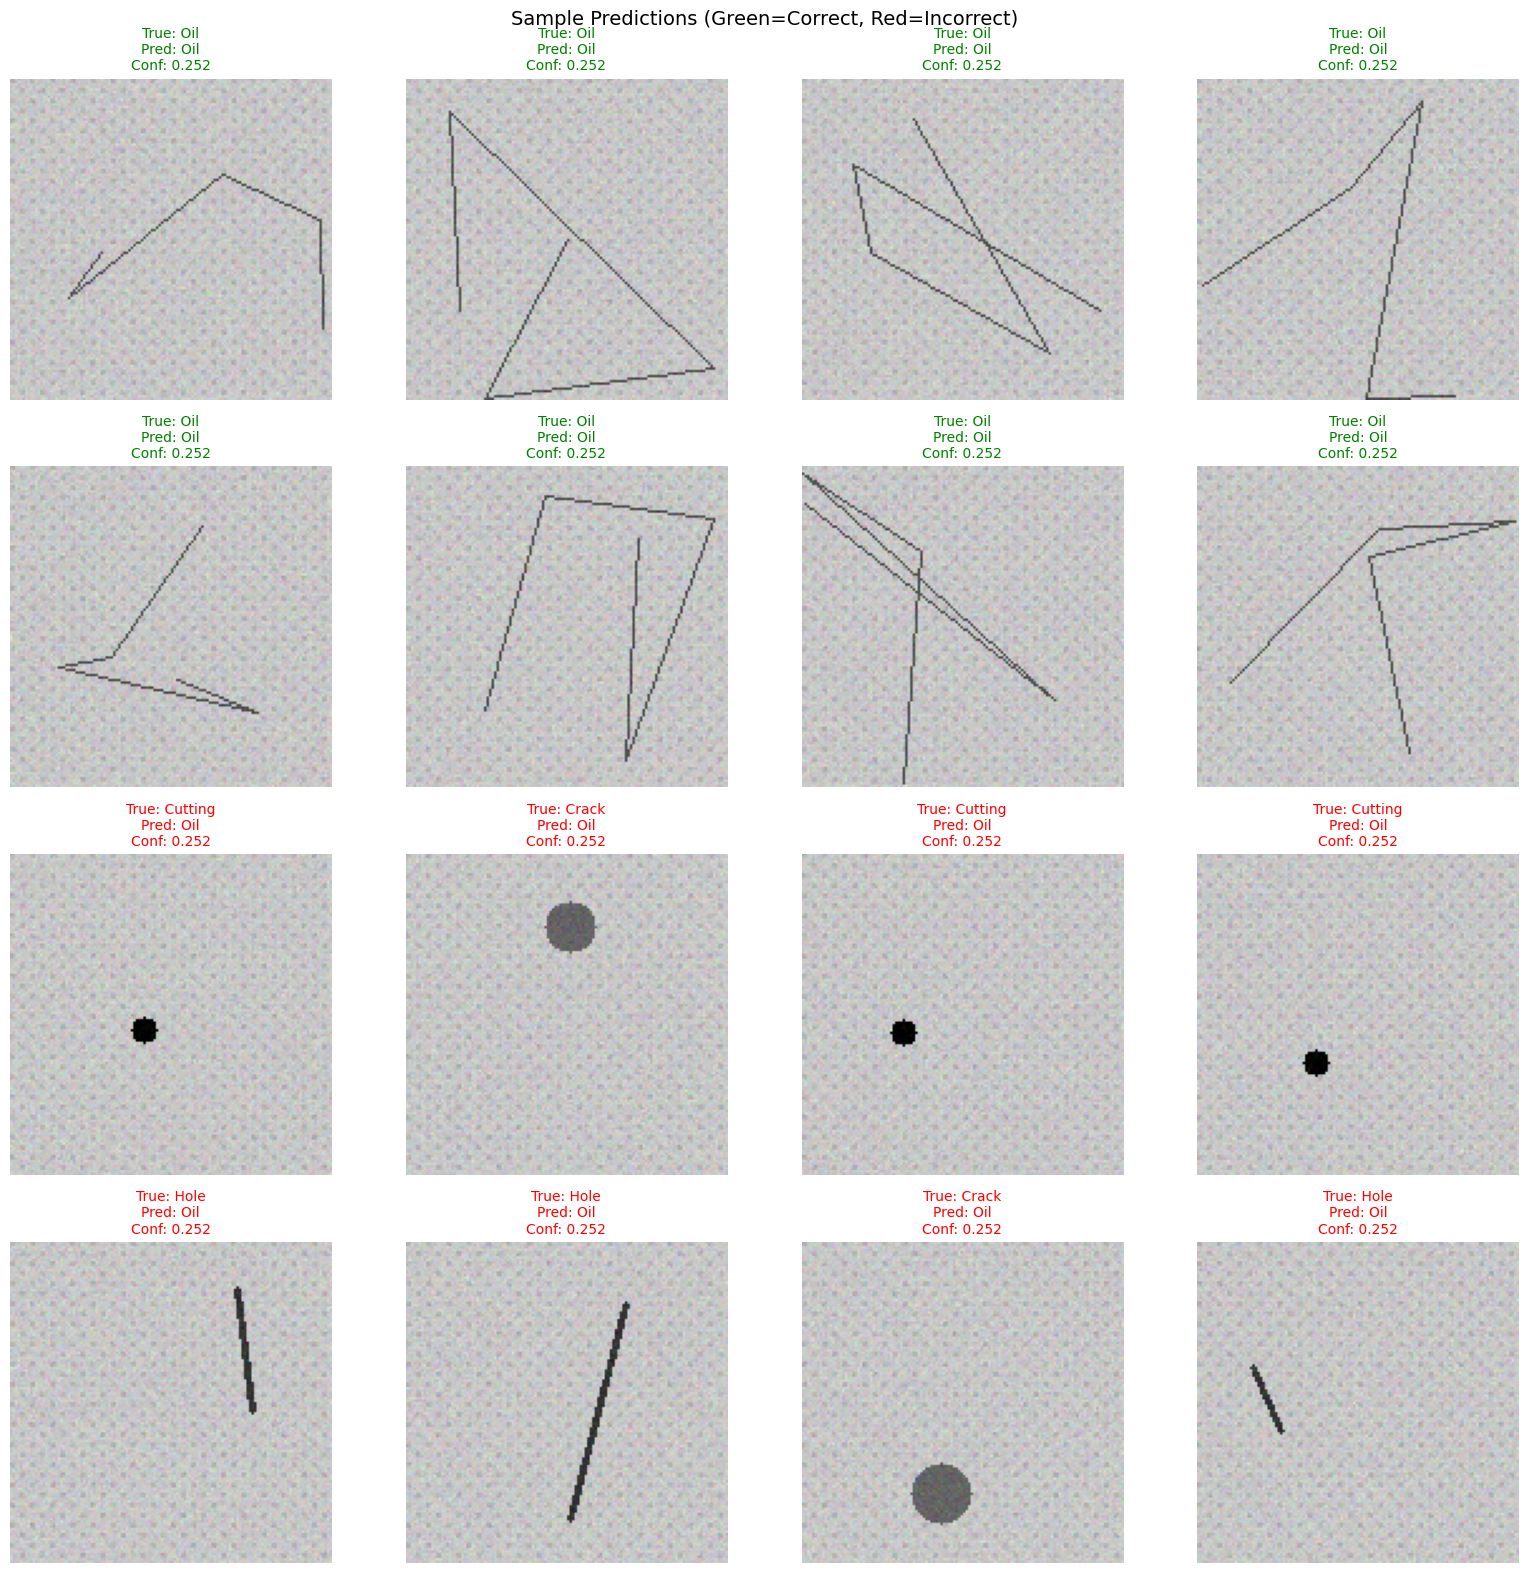

✅ Demo completed!

🚀 FD Dataset Fabric Quality Detection System Ready!
Use main() for real FD Dataset or demo_with_synthetic_data() for demo.


In [28]:
# Fabric Quality Detection System for FD_Dataset (FabricSpotDefect Dataset)
# Specifically designed for Oil, Hole, Cutting, and Crack defects

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import cv2
from PIL import Image
import json
import warnings
warnings.filterwarnings('ignore')

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall

# Image processing
from skimage import feature, measure, filters
from skimage.feature import local_binary_pattern
from skimage.filters import gabor
from scipy import ndimage
from tqdm import tqdm

print("TensorFlow version:", tf.__version__)

class FDDatasetFabricQualityDetector:
    def __init__(self, dataset_path=None, img_height=224, img_width=224):
        self.dataset_path = dataset_path
        self.img_height = img_height
        self.img_width = img_width
        self.model = None
        self.label_encoder = LabelEncoder()
        self.feature_scaler = StandardScaler()

        # FD Dataset specific defect classes
        self.defect_classes = ['Oil', 'Hole', 'Cutting', 'Crack']
        self.class_colors = {
            'Oil': '#FF6B6B',      # Red
            'Hole': '#4ECDC4',     # Teal
            'Cutting': '#45B7D1',  # Blue
            'Crack': '#96CEB4'     # Green
        }

        # Initialize results storage
        self.results = {
            'training_history': None,
            'test_results': {},
            'feature_importance': {},
            'model_performance': {}
        }

    def load_fd_dataset(self, dataset_path=None):
        """Load FD Dataset with proper structure handling"""
        if dataset_path:
            self.dataset_path = dataset_path

        if not self.dataset_path or not os.path.exists(self.dataset_path):
            print("❌ FD Dataset path not found. Please provide correct path.")
            return None, None

        print(f"Loading FD Dataset from: {self.dataset_path}")

        images = []
        labels = []
        file_paths = []

        # Expected FD Dataset structure
        for defect_class in self.defect_classes:
            class_path = os.path.join(self.dataset_path, defect_class)

            if os.path.exists(class_path):
                print(f"Processing {defect_class} images...")

                image_files = [f for f in os.listdir(class_path)
                             if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

                for img_file in tqdm(image_files, desc=f"Loading {defect_class}"):
                    img_path = os.path.join(class_path, img_file)

                    try:
                        # Load and preprocess image
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                            img = cv2.resize(img, (self.img_width, self.img_height))

                            images.append(img)
                            labels.append(defect_class)
                            file_paths.append(img_path)

                    except Exception as e:
                        print(f"Error loading {img_path}: {e}")

                print(f"✅ {defect_class}: {len([l for l in labels if l == defect_class])} images")
            else:
                print(f"⚠️ Warning: {defect_class} folder not found in dataset")

        if not images:
            print("❌ No images loaded. Check dataset structure.")
            return None, None

        images = np.array(images)
        labels = np.array(labels)

        print(f"\n📊 Dataset Summary:")
        print(f"Total images: {len(images)}")
        print(f"Image shape: {images[0].shape}")
        print(f"Classes: {np.unique(labels)}")

        # Display class distribution
        unique, counts = np.unique(labels, return_counts=True)
        for cls, count in zip(unique, counts):
            print(f"  {cls}: {count} images ({count/len(labels)*100:.1f}%)")

        return images, labels, file_paths

    def extract_traditional_features(self, images):
        """Extract traditional computer vision features for fabric defect detection"""
        print("Extracting traditional features...")

        features_list = []

        for img in tqdm(images, desc="Feature extraction"):
            features = {}
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

            # 1. Statistical Features
            features.update(self._extract_statistical_features(gray))

            # 2. Texture Features (GLCM)
            features.update(self._extract_glcm_features(gray))

            # 3. Local Binary Pattern
            features.update(self._extract_lbp_features(gray))

            # 4. Gabor Filter Features
            features.update(self._extract_gabor_features(gray))

            # 5. Edge Features
            features.update(self._extract_edge_features(gray))

            # 6. Shape and Contour Features
            features.update(self._extract_shape_features(gray))

            # 7. Color Features (if applicable)
            features.update(self._extract_color_features(img))

            features_list.append(list(features.values()))

        feature_names = list(features.keys())
        features_array = np.array(features_list)

        print(f"✅ Extracted {features_array.shape[1]} features per image")

        return features_array, feature_names

    def _extract_statistical_features(self, gray):
        """Extract statistical features"""
        features = {}

        # Basic statistics
        features['mean'] = np.mean(gray)
        features['std'] = np.std(gray)
        features['variance'] = np.var(gray)
        features['skewness'] = self._calculate_skewness(gray)
        features['kurtosis'] = self._calculate_kurtosis(gray)

        # Histogram features
        hist, _ = np.histogram(gray, bins=32, range=(0, 256))
        hist = hist / np.sum(hist)  # Normalize

        features['hist_entropy'] = -np.sum(hist * np.log2(hist + 1e-10))
        features['hist_energy'] = np.sum(hist ** 2)

        return features

    def _extract_glcm_features(self, gray):
        """Extract Gray Level Co-occurrence Matrix features"""
        # Reduce gray levels for GLCM computation
        gray_reduced = (gray // 32).astype(np.uint8)  # 8 gray levels

        # Compute GLCM for different angles
        distances = [1, 2]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

        features = {}

        try:
            glcm = greycomatrix(gray_reduced, distances=distances, angles=angles,
                              levels=8, symmetric=True, normed=True)

            # Extract GLCM properties
            features['glcm_contrast'] = np.mean(greycoprops(glcm, 'contrast'))
            features['glcm_dissimilarity'] = np.mean(greycoprops(glcm, 'dissimilarity'))
            features['glcm_homogeneity'] = np.mean(greycoprops(glcm, 'homogeneity'))
            features['glcm_energy'] = np.mean(greycoprops(glcm, 'energy'))
            features['glcm_correlation'] = np.mean(greycoprops(glcm, 'correlation'))
            features['glcm_asm'] = np.mean(greycoprops(glcm, 'ASM'))

        except Exception as e:
            # Fallback values if GLCM computation fails
            features.update({
                'glcm_contrast': 0, 'glcm_dissimilarity': 0, 'glcm_homogeneity': 0,
                'glcm_energy': 0, 'glcm_correlation': 0, 'glcm_asm': 0
            })

        return features

    def _extract_lbp_features(self, gray):
        """Extract Local Binary Pattern features"""
        # LBP parameters
        radius = 3
        n_points = 8 * radius

        lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

        # LBP histogram
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2,
                                  range=(0, n_points + 2))
        lbp_hist = lbp_hist.astype(float)
        lbp_hist /= (lbp_hist.sum() + 1e-10)

        features = {}
        features['lbp_uniformity'] = np.sum(lbp_hist ** 2)
        features['lbp_entropy'] = -np.sum(lbp_hist * np.log2(lbp_hist + 1e-10))
        features['lbp_energy'] = np.sum(lbp_hist ** 2)

        return features

    def _extract_gabor_features(self, gray):
        """Extract Gabor filter features"""
        features = {}

        # Gabor filter parameters
        frequencies = [0.1, 0.3, 0.5]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

        gabor_responses = []

        for freq in frequencies:
            for angle in angles:
                try:
                    real, _ = gabor(gray, frequency=freq, theta=angle)
                    gabor_responses.append(real)
                except:
                    gabor_responses.append(np.zeros_like(gray))

        # Statistical measures of Gabor responses
        features['gabor_mean'] = np.mean([np.mean(resp) for resp in gabor_responses])
        features['gabor_std'] = np.mean([np.std(resp) for resp in gabor_responses])
        features['gabor_energy'] = np.mean([np.sum(resp ** 2) for resp in gabor_responses])

        return features

    def _extract_edge_features(self, gray):
        """Extract edge-based features"""
        features = {}

        # Sobel edges
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Canny edges
        canny = cv2.Canny(gray, 50, 150)

        features['edge_density'] = np.sum(canny > 0) / (canny.shape[0] * canny.shape[1])
        features['edge_mean_magnitude'] = np.mean(sobel_magnitude)
        features['edge_std_magnitude'] = np.std(sobel_magnitude)

        return features

    def _extract_shape_features(self, gray):
        """Extract shape and morphological features"""
        features = {}

        # Threshold image
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            # Largest contour
            largest_contour = max(contours, key=cv2.contourArea)

            # Shape features
            area = cv2.contourArea(largest_contour)
            perimeter = cv2.arcLength(largest_contour, True)

            features['shape_area'] = area
            features['shape_perimeter'] = perimeter
            features['shape_circularity'] = 4 * np.pi * area / (perimeter ** 2 + 1e-10)

            # Aspect ratio
            x, y, w, h = cv2.boundingRect(largest_contour)
            features['shape_aspect_ratio'] = w / (h + 1e-10)
        else:
            features.update({
                'shape_area': 0, 'shape_perimeter': 0,
                'shape_circularity': 0, 'shape_aspect_ratio': 1
            })

        return features

    def _extract_color_features(self, img):
        """Extract color-based features"""
        features = {}

        # Convert to different color spaces
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

        # RGB features
        for i, channel in enumerate(['R', 'G', 'B']):
            features[f'color_{channel}_mean'] = np.mean(img[:,:,i])
            features[f'color_{channel}_std'] = np.std(img[:,:,i])

        # HSV features
        for i, channel in enumerate(['H', 'S', 'V']):
            features[f'color_{channel}_mean'] = np.mean(hsv[:,:,i])
            features[f'color_{channel}_std'] = np.std(hsv[:,:,i])

        return features

    def _calculate_skewness(self, data):
        """Calculate skewness"""
        mean = np.mean(data)
        std = np.std(data)
        return np.mean(((data - mean) / (std + 1e-10)) ** 3)

    def _calculate_kurtosis(self, data):
        """Calculate kurtosis"""
        mean = np.mean(data)
        std = np.std(data)
        return np.mean(((data - mean) / (std + 1e-10)) ** 4) - 3

    def create_cnn_model(self, input_shape):
        """Create CNN model optimized for FD Dataset"""
        model = keras.Sequential([
            # First Convolutional Block
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Second Convolutional Block
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Third Convolutional Block
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Fourth Convolutional Block - Specialized for defect patterns
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.5),

            # Classification layers
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(len(self.defect_classes), activation='softmax')
        ])

        return model

    def create_transfer_learning_model(self, base_model_name='efficientnet'):
        """Create transfer learning model"""
        input_shape = (self.img_height, self.img_width, 3)

        if base_model_name == 'efficientnet':
            base_model = EfficientNetB0(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )
        elif base_model_name == 'resnet':
            base_model = ResNet50(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )
        else:  # VGG16
            base_model = VGG16(
                weights='imagenet',
                include_top=False,
                input_shape=input_shape
            )

        # Freeze base model initially
        base_model.trainable = False

        model = keras.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.5),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(len(self.defect_classes), activation='softmax')
        ])

        return model, base_model

    def train_model(self, X_train, y_train, X_val, y_val,
                   model_type='cnn', epochs=100, fine_tune=True):
        """Train the fabric quality detection model"""

        if model_type == 'cnn':
            self.model = self.create_cnn_model(X_train.shape[1:])
            base_model = None
        else:
            self.model, base_model = self.create_transfer_learning_model(model_type)

        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(label_smoothing=0.1),
            metrics=['accuracy', Precision(), Recall()]
        )

        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=15,
                restore_best_weights=True,
                min_delta=0.001
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=8,
                min_lr=0.0001,
                verbose=1
            ),
            ModelCheckpoint(
                'best_fd_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Enhanced data augmentation for fabric defects
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.15,
            zoom_range=0.15,
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=[0.8, 1.2],
            # contrast_range=[0.8, 1.2], # Removed unsupported argument
            fill_mode='nearest'
        )

        # Initial training
        print("🚀 Starting initial training...")
        history = self.model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

        # Fine-tuning for transfer learning models
        if fine_tune and base_model is not None:
            print("🔧 Fine-tuning the model...")

            # Unfreeze the base model
            base_model.trainable = True

            # Lower learning rate for fine-tuning
            self.model.compile(
                optimizer=Adam(learning_rate=0.0001),
                loss=CategoricalCrossentropy(label_smoothing=0.1),
                metrics=['accuracy', Precision(), Recall()]
            )

            # Continue training
            fine_tune_epochs = epochs // 2
            history_fine = self.model.fit(
                datagen.flow(X_train, y_train, batch_size=16),
                epochs=fine_tune_epochs,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )

            # Combine histories
            for key in history.history.keys():
                history.history[key].extend(history_fine.history[key])

        self.results['training_history'] = history
        return history

    def evaluate_model(self, X_test, y_test):
        """Comprehensive model evaluation"""
        print("📊 Evaluating model...")

        # Predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred_proba, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_true_classes, y_pred_classes)
        f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

        # Store results
        self.results['test_results'] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'y_true': y_true_classes,
            'y_pred': y_pred_classes,
            'y_pred_proba': y_pred_proba
        }

        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Weighted F1-Score: {f1:.4f}")

        # Detailed classification report
        print("\n📋 Classification Report:")
        print(classification_report(
            y_true_classes, y_pred_classes,
            target_names=self.defect_classes,
            digits=4
        ))

        return y_pred_proba, y_pred_classes, y_true_classes

    def analyze_defect_characteristics(self, images, labels):
        """Analyze characteristics of each defect type"""
        print("🔬 Analyzing defect characteristics...")

        defect_analysis = {}

        for defect_class in self.defect_classes:
            class_indices = np.where(labels == defect_class)[0]
            class_images = images[class_indices]

            # Extract features for this class
            features = []
            for img in class_images:
                gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                # Basic statistics
                stats = {
                    'mean_intensity': np.mean(gray),
                    'std_intensity': np.std(gray),
                    'edge_density': np.sum(cv2.Canny(gray, 50, 150) > 0) / gray.size
                }
                features.append(stats)

            # Aggregate statistics
            defect_analysis[defect_class] = {
                'mean_intensity': np.mean([f['mean_intensity'] for f in features]),
                'std_intensity': np.mean([f['std_intensity'] for f in features]),
                'edge_density': np.mean([f['edge_density'] for f in features]),
                'sample_count': len(class_images)
            }

        return defect_analysis

    def visualize_dataset_analysis(self, images, labels):
        """Visualize comprehensive dataset analysis"""
        fig = plt.figure(figsize=(20, 16))

        # 1. Sample images from each class
        ax1 = plt.subplot(3, 3, 1)
        self._plot_sample_images(images, labels, ax1)

        # 2. Class distribution
        ax2 = plt.subplot(3, 3, 2)
        self._plot_class_distribution(labels, ax2)

        # 3. Intensity distribution by class
        ax3 = plt.subplot(3, 3, 3)
        self._plot_intensity_distribution(images, labels, ax3)

        # 4. Training history (if available)
        if self.results['training_history']:
            ax4 = plt.subplot(3, 3, 4)
            self._plot_training_history(ax4)

        # 5. Confusion matrix (if test results available)
        if self.results['test_results']:
            ax5 = plt.subplot(3, 3, 5)
            self._plot_confusion_matrix(ax5)

        # 6. Feature importance (if available)
        ax6 = plt.subplot(3, 3, 6)
        self._plot_defect_characteristics(images, labels, ax6)

        # 7. Model performance by class
        if self.results['test_results']:
            ax7 = plt.subplot(3, 3, 7)
            self._plot_class_performance(ax7)

        plt.tight_layout()
        plt.show()

    def _plot_sample_images(self, images, labels, ax):
        """Plot sample images from each class"""
        # This will be implemented as a separate subplot
        ax.set_title('Sample Images by Class')
        ax.text(0.5, 0.5, 'Sample images\n(see separate visualization)',
               ha='center', va='center', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

    def _plot_class_distribution(self, labels, ax):
        """Plot class distribution"""
        unique, counts = np.unique(labels, return_counts=True)
        colors = [self.class_colors[cls] for cls in unique]

        bars = ax.bar(unique, counts, color=colors, alpha=0.7)
        ax.set_title('Class Distribution')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('Number of Images')

        # Add count labels on bars
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   str(count), ha='center', va='bottom')

        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_intensity_distribution(self, images, labels, ax):
        """Plot intensity distribution by class"""
        for defect_class in self.defect_classes:
            class_indices = np.where(labels == defect_class)[0]
            if len(class_indices) > 0:
                class_images = images[class_indices]
                intensities = [np.mean(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
                             for img in class_images]

                ax.hist(intensities, alpha=0.6, label=defect_class,
                       color=self.class_colors[defect_class], bins=20)

        ax.set_title('Intensity Distribution by Class')
        ax.set_xlabel('Mean Intensity')
        ax.set_ylabel('Frequency')
        ax.legend()

    def _plot_training_history(self, ax):
        """Plot training history"""
        history = self.results['training_history']

        ax.plot(history.history['accuracy'], label='Training Accuracy')
        ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax.set_title('Training History')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_confusion_matrix(self, ax):
        """Plot confusion matrix"""
        results = self.results['test_results']
        cm = confusion_matrix(results['y_true'], results['y_pred'])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.defect_classes,
                   yticklabels=self.defect_classes, ax=ax)
        ax.set_title('Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    def _plot_defect_characteristics(self, images, labels, ax):
        """Plot defect characteristics"""
        characteristics = self.analyze_defect_characteristics(images, labels)

        defect_names = list(characteristics.keys())
        edge_densities = [characteristics[name]['edge_density'] for name in defect_names]

        colors = [self.class_colors[name] for name in defect_names]
        bars = ax.bar(defect_names, edge_densities, color=colors, alpha=0.7)

        ax.set_title('Edge Density by Defect Type')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('Edge Density')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_class_performance(self, ax):
        """Plot per-class performance metrics"""
        if not self.results['test_results']:
            return

        results = self.results['test_results']
        report = classification_report(
            results['y_true'], results['y_pred'],
            target_names=self.defect_classes, output_dict=True
        )

        classes = self.defect_classes
        f1_scores = [report[cls]['f1-score'] for cls in classes]
        colors = [self.class_colors[cls] for cls in classes]

        bars = ax.bar(classes, f1_scores, color=colors, alpha=0.7)
        ax.set_title('F1-Score by Class')
        ax.set_xlabel('Defect Type')
        ax.set_ylabel('F1-Score')
        ax.set_ylim(0, 1)

        # Add score labels on bars
        for bar, score in zip(bars, f1_scores):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom')

        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def visualize_sample_predictions(self, X_test, y_test, num_samples=16):
        """Visualize sample predictions with confidence scores"""
        if not self.results['test_results']:
            print("❌ No test results available. Run evaluation first.")
            return

        results = self.results['test_results']
        y_pred_proba = results['y_pred_proba']
        y_pred_classes = results['y_pred']
        y_true_classes = results['y_true']

        # Select samples (mix of correct and incorrect predictions)
        correct_indices = np.where(y_pred_classes == y_true_classes)[0]
        incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

        # Mix correct and incorrect predictions
        if len(incorrect_indices) > 0:
            sample_indices = np.concatenate([
                np.random.choice(correct_indices, min(num_samples//2, len(correct_indices)), False),
                np.random.choice(incorrect_indices, min(num_samples//2, len(incorrect_indices)), False)
            ])
        else:
            sample_indices = np.random.choice(correct_indices, min(num_samples, len(correct_indices)), False)

        fig, axes = plt.subplots(4, 4, figsize=(16, 16))
        axes = axes.ravel()

        for i, idx in enumerate(sample_indices[:num_samples]):
            # Denormalize image for display
            img = (X_test[idx] * 255).astype(np.uint8)
            axes[i].imshow(img)

            # Get predictions
            true_class = self.defect_classes[y_true_classes[idx]]
            pred_class = self.defect_classes[y_pred_classes[idx]]
            confidence = y_pred_proba[idx][y_pred_classes[idx]]

            # Set title with color coding
            title = f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}"
            color = 'green' if true_class == pred_class else 'red'
            axes[i].set_title(title, color=color, fontsize=10)
            axes[i].axis('off')

        # Hide unused subplots
        for i in range(len(sample_indices), num_samples):
            axes[i].axis('off')

        plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
        plt.tight_layout()
        plt.show()

    def generate_defect_report(self, images, labels):
        """Generate comprehensive defect analysis report"""
        print("📝 Generating Fabric Defect Analysis Report...")

        report = {
            'dataset_summary': {},
            'defect_characteristics': {},
            'model_performance': {},
            'recommendations': []
        }

        # Dataset summary
        unique_labels, counts = np.unique(labels, return_counts=True)
        total_images = len(images)

        report['dataset_summary'] = {
            'total_images': total_images,
            'defect_types': len(self.defect_classes),
            'class_distribution': dict(zip(unique_labels, counts)),
            'class_balance': min(counts) / max(counts)  # Balance ratio
        }

        # Defect characteristics
        defect_analysis = self.analyze_defect_characteristics(images, labels)
        report['defect_characteristics'] = defect_analysis

        # Model performance (if available)
        if self.results['test_results']:
            results = self.results['test_results']
            report['model_performance'] = {
                'overall_accuracy': results['accuracy'],
                'f1_score': results['f1_score'],
                'per_class_performance': self._get_per_class_metrics()
            }

        # Generate recommendations
        report['recommendations'] = self._generate_recommendations(report)

        # Save report to JSON
        with open('fd_dataset_analysis_report.json', 'w') as f:
            json.dump(report, f, indent=4, default=str)

        # Print summary
        self._print_report_summary(report)

        return report

    def _get_per_class_metrics(self):
        """Get per-class performance metrics"""
        if not self.results['test_results']:
            return {}

        results = self.results['test_results']
        report = classification_report(
            results['y_true'], results['y_pred'],
            target_names=self.defect_classes, output_dict=True
        )

        per_class = {}
        for class_name in self.defect_classes:
            if class_name in report:
                per_class[class_name] = {
                    'precision': report[class_name]['precision'],
                    'recall': report[class_name]['recall'],
                    'f1_score': report[class_name]['f1-score'],
                    'support': report[class_name]['support']
                }

        return per_class

    def _generate_recommendations(self, report):
        """Generate recommendations based on analysis"""
        recommendations = []

        # Class imbalance recommendations
        class_balance = report['dataset_summary']['class_balance']
        if class_balance < 0.5:
            recommendations.append(
                "Consider data augmentation or collecting more samples for underrepresented classes"
            )

        # Performance-based recommendations
        if 'model_performance' in report and report['model_performance']:
            accuracy = report['model_performance']['overall_accuracy']

            if accuracy < 0.8:
                recommendations.append(
                    "Model accuracy is below 80%. Consider: (1) More training data, "
                    "(2) Feature engineering, (3) Hyperparameter tuning"
                )
            elif accuracy < 0.9:
                recommendations.append(
                    "Good performance. Consider ensemble methods or advanced architectures "
                    "for further improvement"
                )
            else:
                recommendations.append(
                    "Excellent performance! Model is ready for deployment with proper validation"
                )

        # Defect-specific recommendations
        defect_chars = report['defect_characteristics']
        for defect, chars in defect_chars.items():
            if chars['sample_count'] < 50:
                recommendations.append(
                    f"Collect more samples for {defect} defect type (currently {chars['sample_count']} samples)"
                )

        return recommendations

    def _print_report_summary(self, report):
        """Print formatted report summary"""
        print("\n" + "="*60)
        print("🔍 FABRIC DEFECT ANALYSIS REPORT SUMMARY")
        print("="*60)

        # Dataset summary
        ds = report['dataset_summary']
        print(f"\n📊 Dataset Overview:")
        print(f"   Total Images: {ds['total_images']}")
        print(f"   Defect Types: {ds['defect_types']}")
        print(f"   Class Balance Ratio: {ds['class_balance']:.3f}")

        print(f"\n📈 Class Distribution:")
        for class_name, count in ds['class_distribution'].items():
            percentage = (count / ds['total_images']) * 100
            print(f"   {class_name}: {count} images ({percentage:.1f}%)")

        # Model performance
        if 'model_performance' in report and report['model_performance']:
            mp = report['model_performance']
            print(f"\n🎯 Model Performance:")
            print(f"   Overall Accuracy: {mp['overall_accuracy']:.4f}")
            print(f"   Weighted F1-Score: {mp['f1_score']:.4f}")

            if 'per_class_performance' in mp:
                print(f"\n   Per-Class Performance:")
                for class_name, metrics in mp['per_class_performance'].items():
                    print(f"      {class_name}: F1={metrics['f1_score']:.3f}, "
                         f"Precision={metrics['precision']:.3f}, "
                         f"Recall={metrics['recall']:.3f}")

        # Recommendations
        print(f"\n💡 Recommendations:")
        for i, rec in enumerate(report['recommendations'], 1):
            print(f"   {i}. {rec}")

        print("\n✅ Full report saved to 'fd_dataset_analysis_report.json'")
        print("="*60)

    def predict_single_image(self, image_path):
        """Predict defect type for a single fabric image"""
        if self.model is None:
            print("❌ Model not trained. Please train the model first.")
            return None

        try:
            # Load and preprocess image
            if isinstance(image_path, str):
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img = image_path

            img_resized = cv2.resize(img, (self.img_width, self.img_height))
            img_normalized = img_resized.astype('float32') / 255.0
            img_batch = np.expand_dims(img_normalized, axis=0)

            # Make prediction
            prediction = self.model.predict(img_batch, verbose=0)
            predicted_class_idx = np.argmax(prediction[0])
            confidence = prediction[0][predicted_class_idx]
            predicted_class = self.defect_classes[predicted_class_idx]

            # Get all class probabilities
            class_probabilities = {}
            for i, class_name in enumerate(self.defect_classes):
                class_probabilities[class_name] = prediction[0][i]

            result = {
                'predicted_class': predicted_class,
                'confidence': confidence,
                'all_probabilities': class_probabilities
            }

            return result

        except Exception as e:
            print(f"❌ Error predicting image: {e}")
            return None

    def cross_validate_model(self, images, labels, cv_folds=5):
        """Perform cross-validation for robust performance assessment"""
        print(f"🔄 Performing {cv_folds}-fold cross-validation...")

        # Prepare data
        images_normalized = images.astype('float32') / 255.0
        labels_encoded = self.label_encoder.fit_transform(labels)
        labels_categorical = keras.utils.to_categorical(labels_encoded, len(self.defect_classes))

        # Cross-validation
        kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        cv_scores = []
        cv_f1_scores = []

        fold = 1
        for train_idx, val_idx in kfold.split(images_normalized, labels_encoded):
            print(f"\nTraining fold {fold}/{cv_folds}...")

            X_train_fold, X_val_fold = images_normalized[train_idx], images_normalized[val_idx]
            y_train_fold, y_val_fold = labels_categorical[train_idx], labels_categorical[val_idx]

            # Create and train model for this fold
            model_fold = self.create_cnn_model(X_train_fold.shape[1:])
            model_fold.compile(
                optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train with fewer epochs for CV
            model_fold.fit(
                X_train_fold, y_train_fold,
                epochs=30,
                batch_size=32,
                validation_data=(X_val_fold, y_val_fold),
                verbose=0
            )

            # Evaluate fold
            y_pred_fold = model_fold.predict(X_val_fold, verbose=0)
            y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
            y_true_classes_fold = np.argmax(y_val_fold, axis=1)

            fold_accuracy = accuracy_score(y_true_classes_fold, y_pred_classes_fold)
            fold_f1 = f1_score(y_true_classes_fold, y_pred_classes_fold, average='weighted')

            cv_scores.append(fold_accuracy)
            cv_f1_scores.append(fold_f1)

            print(f"Fold {fold} - Accuracy: {fold_accuracy:.4f}, F1: {fold_f1:.4f}")
            fold += 1

        # Summary
        mean_accuracy = np.mean(cv_scores)
        std_accuracy = np.std(cv_scores)
        mean_f1 = np.mean(cv_f1_scores)
        std_f1 = np.std(cv_f1_scores)

        print(f"\n📊 Cross-Validation Results:")
        print(f"   Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
        print(f"   Mean F1-Score: {mean_f1:.4f} (±{std_f1:.4f})")

        return {
            'cv_scores': cv_scores,
            'cv_f1_scores': cv_f1_scores,
            'mean_accuracy': mean_accuracy,
            'std_accuracy': std_accuracy,
            'mean_f1': mean_f1,
            'std_f1': std_f1
        }

    def complete_fd_dataset_pipeline(self, dataset_path, test_size=0.2, val_size=0.1):
        """Complete pipeline for FD Dataset fabric quality detection"""
        print("🚀 Starting Complete FD Dataset Fabric Quality Detection Pipeline")
        print("="*70)

        # Step 1: Load dataset
        print("\n📂 Step 1: Loading FD Dataset...")
        images, labels, file_paths = self.load_fd_dataset(dataset_path)

        if images is None:
            print("❌ Failed to load dataset. Please check the path.")
            return None

        # Step 2: Dataset analysis
        print("\n🔬 Step 2: Analyzing dataset characteristics...")
        self.visualize_dataset_analysis(images, labels)

        # Step 3: Prepare data
        print("\n⚙️ Step 3: Preparing data...")
        images_normalized = images.astype('float32') / 255.0
        labels_encoded = self.label_encoder.fit_transform(labels)
        labels_categorical = keras.utils.to_categorical(labels_encoded, len(self.defect_classes))

        # Step 4: Split data
        print("\n✂️ Step 4: Splitting data...")
        X_temp, X_test, y_temp, y_test = train_test_split(
            images_normalized, labels_categorical,
            test_size=test_size, random_state=42, stratify=labels_encoded
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp,
            test_size=val_size/(1-test_size), random_state=42,
            stratify=np.argmax(y_temp, axis=1)
        )

        print(f"   Training samples: {len(X_train)}")
        print(f"   Validation samples: {len(X_val)}")
        print(f"   Test samples: {len(X_test)}")

        # Step 5: Train model
        print("\n🎯 Step 5: Training CNN model...")
        history = self.train_model(X_train, y_train, X_val, y_val,
                                 model_type='cnn', epochs=80)

        # Step 6: Evaluate model
        print("\n📊 Step 6: Evaluating model...")
        y_pred_proba, y_pred_classes, y_true_classes = self.evaluate_model(X_test, y_test)

        # Step 7: Visualize results
        print("\n📈 Step 7: Visualizing results...")
        self.visualize_sample_predictions(X_test, y_test)

        # Step 8: Cross-validation
        print("\n🔄 Step 8: Cross-validation...")
        cv_results = self.cross_validate_model(images, labels, cv_folds=5)

        # Step 9: Generate comprehensive report
        print("\n📝 Step 9: Generating report...")
        report = self.generate_defect_report(images, labels)

        print("\n✅ Pipeline completed successfully!")

        return {
            'model': self.model,
            'history': history,
            'cv_results': cv_results,
            'report': report,
            'test_results': self.results['test_results']
        }

# Example usage and main execution
def main():
    """Main function to run FD Dataset fabric quality detection"""
    print("🔥 FD Dataset Fabric Quality Detection System")
    print("=" * 50)

    # Initialize detector
    detector = FDDatasetFabricQualityDetector(img_height=224, img_width=224)

    # Example dataset path (user needs to provide actual path)
    dataset_path = "/path/to/FD_Dataset"  # Update this path

    print(f"📋 Expected dataset structure:")
    print(f"   {dataset_path}/")
    print(f"   ├── Oil/")
    print(f"   ├── Hole/")
    print(f"   ├── Cutting/")
    print(f"   └── Crack/")
    print()

    # For demonstration, let's show what the system can do
    print("🚀 System capabilities:")
    print("1. Load and analyze FD Dataset")
    print("2. Extract traditional CV features")
    print("3. Train CNN and transfer learning models")
    print("4. Comprehensive evaluation and visualization")
    print("5. Cross-validation for robust assessment")
    print("6. Generate detailed analysis reports")
    print("7. Single image prediction")

    # Uncomment below to run the actual pipeline
    # results = detector.complete_fd_dataset_pipeline(dataset_path)

    print(f"\n📝 To use this system:")
    print(f"1. Download FD Dataset from Figshare")
    print(f"2. Extract to a folder with the expected structure")
    f"3. Update the dataset_path variable"
    print(f"4. Run: detector.complete_fd_dataset_pipeline(dataset_path)")

def demo_with_synthetic_data():
    """Demo function with synthetic FD-like data"""
    print("🎮 Running demo with synthetic FD-like data...")

    detector = FDDatasetFabricQualityDetector(img_height=128, img_width=128)

    # Create synthetic data resembling FD dataset
    np.random.seed(42)
    num_samples_per_class = 50

    images = []
    labels = []

    for defect_class in detector.defect_classes:
        for _ in range(num_samples_per_class):
            # Create base fabric texture
            img = np.ones((128, 128, 3), dtype=np.uint8) * 200

            # Add fabric-like texture
            for i in range(0, 128, 4):
                for j in range(0, 128, 4):
                    if (i//4 + j//4) % 2 == 0:
                        img[i:i+2, j:j+2] = [180, 180, 180]

            # Add defect-specific patterns
            if defect_class == 'Oil':
                # Dark spots
                center = (np.random.randint(20, 108), np.random.randint(20, 108))
                cv2.circle(img, center, np.random.randint(5, 15), (100, 100, 100), -1)
            elif defect_class == 'Hole':
                # Black holes
                center = (np.random.randint(15, 113), np.random.randint(15, 113))
                cv2.circle(img, center, np.random.randint(3, 8), (0, 0, 0), -1)
            elif defect_class == 'Cutting':
                # Linear cuts
                pt1 = (np.random.randint(0, 128), np.random.randint(0, 64))
                pt2 = (np.random.randint(0, 128), np.random.randint(64, 128))
                cv2.line(img, pt1, pt2, (50, 50, 50), 2)
            elif defect_class == 'Crack':
                # Crack-like patterns
                pts = []
                for k in range(5):
                    pts.append((np.random.randint(0, 128), np.random.randint(0, 128)))
                pts = np.array(pts, np.int32)
                cv2.polylines(img, [pts], False, (80, 80, 80), 1)

            # Add noise
            noise = np.random.normal(0, 10, img.shape).astype(np.int16)
            img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

            images.append(img)
            labels.append(defect_class)

    images = np.array(images)
    labels = np.array(labels)

    print(f"✅ Created synthetic dataset: {len(images)} images")

    # Run abbreviated pipeline
    detector.visualize_dataset_analysis(images, labels)

    # Quick training demo
    images_normalized = images.astype('float32') / 255.0
    labels_encoded = detector.label_encoder.fit_transform(labels)
    labels_categorical = keras.utils.to_categorical(labels_encoded, len(detector.defect_classes))

    X_train, X_test, y_train, y_test = train_test_split(
        images_normalized, labels_categorical, test_size=0.3, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # Quick training
    print("🚀 Quick training demo...")
    history = detector.train_model(X_train, y_train, X_val, y_val,
                                 model_type='cnn', epochs=20)

    # Evaluation
    detector.evaluate_model(X_test, y_test)
    detector.visualize_sample_predictions(X_test, y_test)

    print("✅ Demo completed!")

if __name__ == "__main__":
    # Run main demo
    main()

    # Run synthetic demo
    print("\n" + "="*70)
    demo_with_synthetic_data()

print("\n🚀 FD Dataset Fabric Quality Detection System Ready!")
print("Use main() for real FD Dataset or demo_with_synthetic_data() for demo.")